# INSAID Telecom Data Analysis

<img src="Telecom_Image.jpg" style="width:600px;height:250px"/>

## Table of Content

1. [Import Libraries](#section1)<br>
2. ["Gender_Age_Train" dataset mining & Analysis](#section2)<br>
   - 2.1 [Database Connection](#section21)<br>
   - 2.2 [Data Extraction and Exploration](#section22)<br>
   - 2.3 [Checking the NULL values](#section23)<br>
   - 2.4 [Analyzing the data with visulization](#section24)<br>
    - 2.4.1 [Distribution of Users across Gender](#section241)<br>
    - 2.4.2 [Distribution of Users across Gender Percentage](#section242)<br>
    - 2.4.3 [Group wise count of Devices](#section243)<br>
    - 2.4.4 [Group wise count of Devices for Male and Female](#section244)<br>
    - 2.4.5 [Age wise top 30 count of Devices for Male and Female](#section245)<br>
    - 2.4.6 [Age wise count of Devices histogram](#section246)<br>
    - 2.4.7 [Top 30 Count of Devices Age wise](#section247)<br>
3. ["Phone Brand Device model" dataset mining and Analysis](#section3)<br>
  - 3.1 [Data Extraction and Exploration](#section31)<br>
  - 3.2 [Converting Phone brands from chinese to english language](#section32)<br>
  - 3.3 [Converting Models from chinese to english language](#section33)<br>
  - 3.4 [Analyzing the data with visulization](#section34)<br>
  - 3.5 [Brand wise top 30 count of devices](#section35)<br>
  - 3.6 [Model wise top 30 count of devices](#section36)<br>
  - 3.7 [Each Brand wise Models and top 10 count of devices](#section37)<br>
  - 3.8 [Brand & Model wise top 50 count of devices](#section38)<br>
4. [Events Data Extraction and Exploration](#section4)<br>
  - 4.1 [Extracting the data from CSV file](#section41)<br>

<a id=section1></a>
### Import Libraries

In [3]:
import pandas as pd
import numpy as np
import pandas_profiling
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.graph_objects as go
import mysql.connector
import statistics

<a id=section2></a>
### Gender Age Train dataset mining & Analysis

<a id=section21></a>
#### Database connection

In [4]:
connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student')

<a id=section22></a>
#### Data Extraction and Exploration

In [5]:
print('---------------------------------------------------------------------------------------------------------')
sql_select_Query = "select * from gender_age_train"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("\n Storing records from gender_age_train to dataframe")

gender_age_train_df = pd.DataFrame(records,columns = ['device_id','gender','age','group'])

---------------------------------------------------------------------------------------------------------

 Storing records from gender_age_train to dataframe


In [6]:
gender_age_train_df.head(5)

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


In [7]:
#gender_age_train_df_new = gender_age_train_df.rename(columns={0:'device_id',1:'gender',2:'age',3:'group'})

<a id=section23><a>
#### Checking the NULL values

In [8]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total,percent], axis = 1, keys = ['Total','Percent'])

In [9]:
missing_data(gender_age_train_df)

,Total,Percent
group,0,0.0
age,0,0.0
gender,0,0.0
device_id,0,0.0


In [10]:
gender_age_train_df.shape

(74645, 4)

In [11]:
gender_age_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null int64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: int64(2), object(2)
memory usage: 2.3+ MB


In [12]:
gender_age_train_df.describe(include= 'all')

,device_id,gender,age,group
count,7.464500e+04,74645,74645.000000,74645
unique,NaN,2,NaN,12
top,NaN,M,NaN,M23-26
freq,NaN,47904,NaN,9605
mean,-7.491354e+14,NaN,31.410342,NaN
std,5.327150e+18,NaN,9.868735,NaN
min,-9.223067e+18,NaN,1.000000,NaN
25%,-4.617367e+18,NaN,25.000000,NaN
50%,-1.841362e+16,NaN,29.000000,NaN
75%,4.636656e+18,NaN,36.000000,NaN


There is no NULL values in Gender Age dataset.

<a id=section24><a>
### Analyzing the data with visulization

<a id=section241><a>
#### Distribution of Users across Gender

In [13]:
 gender_age_train_df['gender'].value_counts()

M    47904
F    26741
Name: gender, dtype: int64

Text(0.5, 1.0, 'Distribution of Users across Gender')

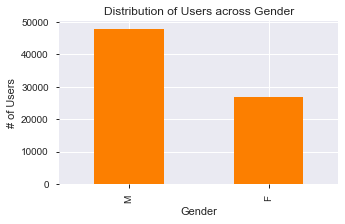

In [249]:
plt.figure(figsize=(5,3))
gender_age_train_df['gender'].value_counts().plot.bar(colormap = 'Wistia_r')
plt.xlabel('Gender')
plt.ylabel('# of Users')
plt.title('Distribution of Users across Gender')

<a id=section242><a>
#### Distribution of Users across Gender percentage 

Text(0.5, 1.0, 'Pie chart showing Distribution of Users across Gender')

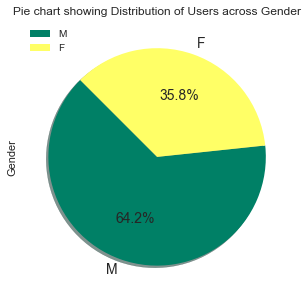

In [246]:
gender_age_train_df['gender'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', 
                                               figsize=(5,5), shadow=True, startangle=135, legend=True, cmap='summer')

plt.ylabel('Gender')
plt.title('Pie chart showing Distribution of Users across Gender')


<a id=section243><a>
#### Group wise count of Devices

Text(0, 0.5, 'Group')

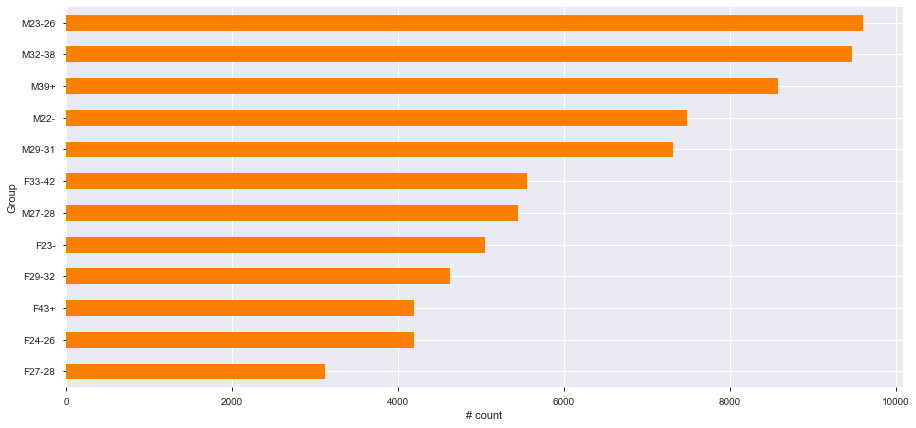

In [16]:
plt.figure(figsize=(15,7))
gender_age_train_df['group'].value_counts().sort_values(ascending = True).plot.barh(colormap = 'Wistia_r')
plt.xlabel('# count')
plt.ylabel('Group')


In [17]:
gender_age_train_df.head()
dfg = gender_age_train_df.groupby(['gender', 'group']).agg({'group': [ 'count']})
pd.set_option('display.max_rows', 1000)
g = dfg['group','count'].groupby(level=0, group_keys=False).apply(
    lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
g

,gender,group,count
0,F,F33-42,5561
1,F,F23-,5050
2,F,F29-32,4628
3,F,F43+,4194
4,F,F24-26,4190
5,F,F27-28,3118
6,M,M23-26,9605
7,M,M32-38,9476
8,M,M39+,8581
9,M,M22-,7488


<a id=section244><a>
#### Group wise count of Devices for Male and Female

Text(0, 0.5, 'Female Group')

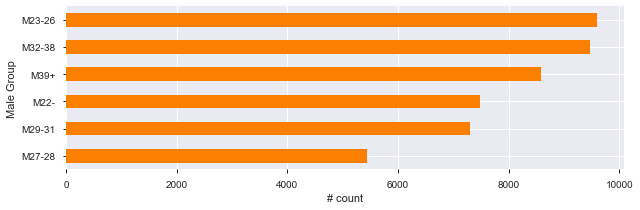

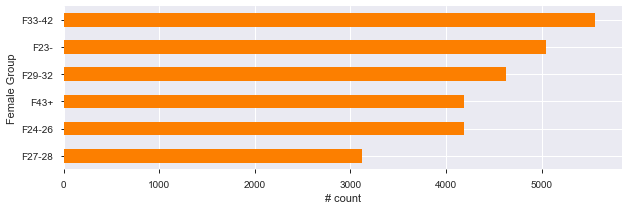

In [18]:
plt.figure(figsize=(10,3))
gender_age_train_df.loc[gender_age_train_df['gender'] == 'M']['group'].value_counts().sort_values().plot.barh(colormap = 'Wistia_r')
plt.xlabel('# count')
plt.ylabel('Male Group')
plt.figure(figsize=(10,3))
gender_age_train_df.loc[gender_age_train_df['gender'] == 'F']['group'].value_counts().sort_values().plot.barh(colormap = 'Wistia_r')
plt.xlabel('# count')
plt.ylabel('Female Group')


<a id=section245><a>
#### Age wise top 30 count of Devices for Male and Female

Text(0, 0.5, 'Count of Female')

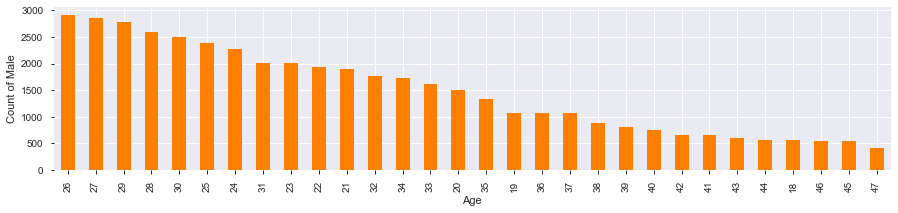

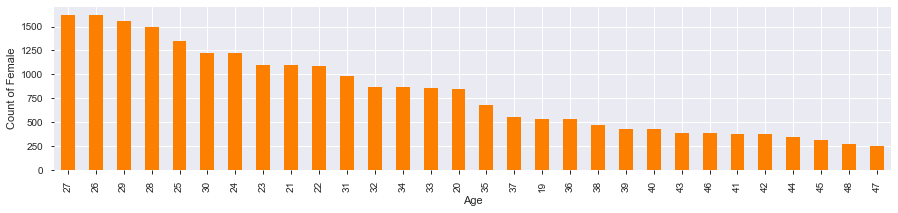

In [19]:
plt.figure(figsize=(15,3))
gender_age_train_df.loc[gender_age_train_df['gender'] == 'M']['age'].value_counts()[:30].sort_values(ascending = False).plot.bar(colormap = 'Wistia_r')
plt.xlabel('Age')
plt.ylabel('Count of Male')
plt.figure(figsize=(15,3))
gender_age_train_df.loc[gender_age_train_df['gender'] == 'F']['age'].value_counts()[:30].sort_values(ascending = False).plot.bar(colormap = 'Wistia_r')
plt.xlabel('Age')
plt.ylabel('Count of Female')


<a id=section246><a>
#### Age wise count of Devices histogram

Text(0.5, 0, 'Age')

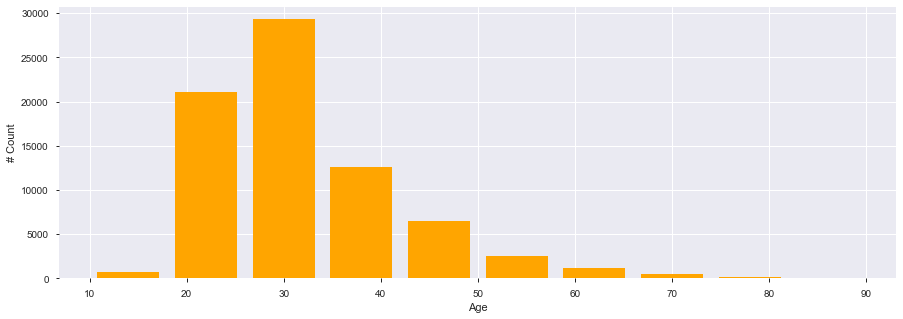

In [20]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(gender_age_train_df['age'], 10, range, color = 'orange', rwidth = 0.8)
plt.ylabel("# Count")
plt.xlabel("Age")

<a id=section247><a>
#### Top 30 Count of Devices Age wise

Text(0, 0.5, 'Count')

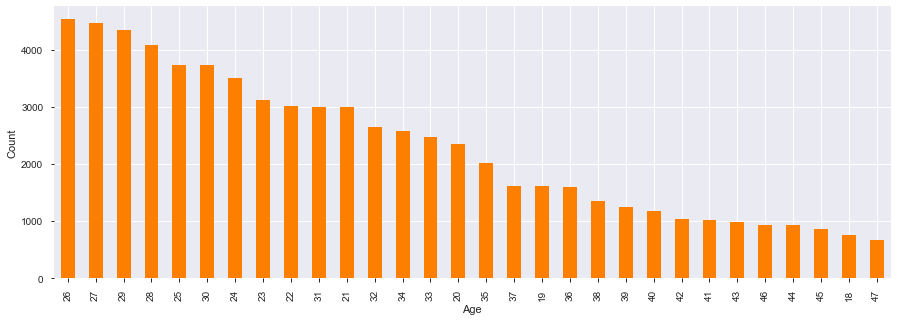

In [21]:
plt.figure(figsize=(15,5))
gender_age_train_df['age'].value_counts()[:30].sort_values(ascending = False).plot.bar(colormap = 'Wistia_r')
plt.xlabel('Age')
plt.ylabel('Count')


In [22]:
gender_age_train_df.head()

,device_id,gender,age,group
0,-8076087639492063270,M,35,M32-38
1,-2897161552818060146,M,35,M32-38
2,-8260683887967679142,M,35,M32-38
3,-4938849341048082022,M,30,M29-31
4,245133531816851882,M,30,M29-31


<a id=section3><a>
### Phone Brand Device model dataset mining and Analysis

<a id=section31><a>
#### Data Extraction and Exploration

In [23]:
connection = mysql.connector.connect(host='cpanel.insaid.co',
                                         database='Capstone1',
                                         user='student',
                                         password='student') 
print('---------------------------------------------------------------------------------------------------------')
sql_select_Query = "select * from phone_brand_device_model"
cursor = connection.cursor()
cursor.execute(sql_select_Query)
records = cursor.fetchall()
print("\n Storing records from phone_brand_device_model to dataframe")

phone_brand_device_model_df = pd.DataFrame(records,columns = ['device_id','phone_brand','device_model'])


---------------------------------------------------------------------------------------------------------

 Storing records from phone_brand_device_model to dataframe


In [24]:
phone_brand_device_model_df.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,小米,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,三星,A368t
4,-2015528097870762664,小米,红米Note2


In [25]:
phone_brand_device_model_df['phone_brand'].unique()

array(['vivo', '小米', 'OPPO', '三星', '酷派', '联想 ', '华为', '奇酷', '魅族', '斐讯',
       '中国移动', 'HTC', '天语', '至尊宝', 'LG', '欧博信', '优米', 'ZUK', '努比亚', '惠普',
       '尼比鲁', '美图', '乡米', '摩托罗拉', '梦米', '锤子', '富可视', '乐视', '海信', '百立丰',
       '一加', '语信', '海尔', '酷比', '纽曼', '波导', '朵唯', '聆韵', 'TCL', '酷珀', '爱派尔',
       'LOGO', '青葱', '果米', '华硕', '昂达', '艾优尼', '康佳', '优购', '邦华', '赛博宇华',
       '黑米', 'Lovme', '先锋', 'E派', '神舟', '诺基亚', '普耐尔', '糖葫芦', '亿通', '欧新',
       '米奇', '酷比魔方', '蓝魔', '小杨树', '贝尔丰', '糯米', '米歌', 'E人E本', '西米', '大Q',
       '台电', '飞利浦', '唯米', '大显', '长虹', '维图', '青橙', '本为', '虾米', '夏新', '帷幄',
       '百加', 'SUGAR', '欧奇', '世纪星', '智镁', '欧比', '基伍', '飞秒', '德赛', '易派',
       '谷歌', '金星数码', '广信', '诺亚信', 'MIL', '白米', '大可乐', '宝捷讯', '优语', '首云',
       '瑞米', '瑞高', '沃普丰', '摩乐', '鲜米', '凯利通', '唯比', '欧沃', '丰米', '恒宇丰',
       '奥克斯', '西门子', '欧乐迪', 'PPTV'], dtype=object)

<a id=section32><a>
### Converting Phone brands from chinese to english language

In [26]:
brands_in_chinese = ['华为','小米','三星','魅族','酷派','乐视','联想 ','vivo','OPPO','HTC','LG','TCL','LOGO','Lovme','ZUK','PPTV','努比亚','海信','天语','夏新','欧比', '优米', '欧博信', '奇酷', '锤子', '酷比魔方', '语信', '朵唯', '德赛', '一加',
       '华硕', '普耐尔', '易派', '摩托罗拉', '优购', '酷珀', '梦米', '爱派尔', '昂达', '邦华',
       '聆韵', '中国移动', '诺亚信', '酷比', '艾优尼', '斐讯', '富可视', '欧新', '美图', '宝捷讯',
       '青橙', '果米', '波导', '诺基亚', '神舟', '糯米', '亿通', '纽曼', '唯米', '百立丰',
       '沃普丰', '虾米', '凯利通', '贝尔丰', '至尊宝', '蓝魔', '青葱', '白米', '大可乐', '尼比鲁',
       '康佳', '乡米', '黑米', '海尔', '优语', '维图', '米歌', '广信', 'E派', '小杨树', '糖葫芦',
       '西米', '谷歌', '长虹', '飞利浦', '惠普', '台电', '大Q', '鲜米', '先锋', '欧奇','赛博宇华','米奇','E人E本','大显','本为','帷幄','百加','世纪星', '智镁','基伍', '飞秒','金星数码','首云', '瑞米', '瑞高','摩乐','唯比', '欧沃', '丰米','恒宇丰', '奥克斯', '西门子', '欧乐迪']
brands_in_english = ['Huawei','Xiaomi','Samsung','Meizu','Coolpad','LeEco','Lenovo','vivo','OPPO','HTC','LG','TCL','LOGO','Lovme','ZUK','PPTV','Nubia','Hisense','Amagatarai','Amoi','Obi', 'Youmi', 'Obson', 'Qiku', 'Hammer', 'Cubei Cube', 'Letters', 'Duowei', 'Desai', 'One Plus','ASUS', 'Punale', 'Yipai', 'Motorola', 'Yougo', 'Cooper', 'Mengmi', 'Aipair', 'Onda', 'Banghua', 'Lingyun', 'China Mobile', 'Noah',' Coolby ',' Aiyouni ',' Feixun ',' Focus', 'Ou Xin', 'Meitu', 'Projet News','Green Orange', 'Fruit Rice', 'Flyer', 'Nokia', 'Shenzhou', 'Glutinous Rice', 'Yi Tong', 'Newman', 'Wei Mi', 'Bai Li Feng','Wopfung', 'Shrimp', 'Kellystone', 'Bellfonte', 'Extreme Treasure', 'Blue Devils', 'Scallion', 'White Rice', 'Big Cola', 'Nibiru','Kangjia', 'Xianmi', 'Black Rice', 'Haier', 'Youyu', 'Weitu', 'Mi Ge', 'Guangxin', 'E-Pay', 'Little Poplar', ' Candied ','Simi', 'Google', 'Changhong','Philips', 'HP', 'Taipower', 'Big Q', 'Fresh Rice', 'Pioneer', 'Ouqi','Cyber Yuhua','Mickey','E people E Ben','Daxian','Originally','Curtain','Bacardi','Century Star','Wisdom magnesium','Kivu','Femtosecond','Venus Digital','Shouyun','Remi','Rego','Mola','Vibe','Ovo','Fengmi','Heng Yufeng','Oaks','Siemens','Oledi']

brands_dict1 = dict(zip(brands_in_chinese, brands_in_english)) 


The purpose of zip() is to map the similar index of multiple containers so that they can be used just using as single entity.

In [27]:
def translator(val):
    if val in brands_dict1:
        return brands_dict1[val]
    else:
        return val

In [28]:
phone_brand_device_model_df.phone_brand = phone_brand_device_model_df.phone_brand.apply(translator)

__apply__ allow the users to pass a function and apply it on every single value of the Pandas series. It comes as a huge improvement for the pandas library as this function helps to segregate data according to the conditions required due to which it is efficiently used in data science and machine learning.

In [29]:
phone_brand_device_model_df['phone_brand'].unique()

array(['vivo', 'Xiaomi', 'OPPO', 'Samsung', 'Coolpad', 'Lenovo', 'Huawei',
       'Qiku', 'Meizu', ' Feixun ', 'China Mobile', 'HTC', 'Amagatarai',
       'Extreme Treasure', 'LG', 'Obson', 'Youmi', 'ZUK', 'Nubia', 'HP',
       'Nibiru', 'Meitu', 'Xianmi', 'Motorola', 'Mengmi', 'Hammer',
       ' Focus', 'LeEco', 'Hisense', 'Bai Li Feng', 'One Plus', 'Letters',
       'Haier', ' Coolby ', 'Newman', 'Flyer', 'Duowei', 'Lingyun', 'TCL',
       'Cooper', 'Aipair', 'LOGO', 'Scallion', 'Fruit Rice', 'ASUS',
       'Onda', ' Aiyouni ', 'Kangjia', 'Yougo', 'Banghua', 'Cyber Yuhua',
       'Black Rice', 'Lovme', 'Pioneer', 'E-Pay', 'Shenzhou', 'Nokia',
       'Punale', ' Candied ', 'Yi Tong', 'Ou Xin', 'Mickey', 'Cubei Cube',
       'Blue Devils', 'Little Poplar', 'Bellfonte', 'Glutinous Rice',
       'Mi Ge', 'E people E Ben', 'Simi', 'Big Q', 'Taipower', 'Philips',
       'Wei Mi', 'Daxian', 'Changhong', 'Weitu', 'Green Orange',
       'Originally', 'Shrimp', 'Amoi', 'Curtain', 'Bacardi', 'S

In [30]:
phone_brand_device_model_df.shape

(87726, 3)

In [31]:
phone_brand_device_model_df.isnull().sum()

device_id       0
phone_brand     0
device_model    0
dtype: int64

<a id=section33><a>
#### Converting Models from chinese to english language

In [35]:
Models_in_chinese = ['红米note','红米Note2','荣耀6','荣耀畅玩4X','荣耀3C','红米1S','魅蓝NOTE','红米2','红米Note2','荣耀6 Plus','红米2A'
                     ,'红米note增强版','魅蓝Note 2','荣耀3X畅玩版','小米note','荣耀畅玩4C','红米','2016版 Galaxy A5','2016版 Galaxy A7','2016版 Galaxy A9','2016版 Galaxy J7'
                     ,'超级手机Max','远航3','醉享','野火S','金刚II','金钢','锋尚','锋尚2','锋尚Max','锋尚Pro','雷霆战机','青春版','青漾3'
                     ,'领世旗舰3','风华3','飞马','飞马2 Plus','飞马3','魅蓝','魅蓝2','魅蓝Note3','魅蓝metal','魔镜 X5','麦芒3'
                     ,'麦芒3S','麦芒4','黄金斗士A8','黄金斗士Note8','黄金斗士S8畅玩版','黄金斗士青春版','红米3','红米Note3','红辣椒','红辣椒 X1'
                     ,'红辣椒NX Plus','红辣椒Note','红辣椒Note3','红辣椒XM	','红辣椒任性版 Plus','纽扣','联想VIBE X2','联想黄金斗士S8','荣耀+'
                     ,'荣耀3C畅玩版','荣耀3X','荣耀4A','荣耀6 plus','荣耀7','荣耀7i','荣耀U8860','荣耀X2','荣耀平板T1-823L','荣耀畅玩4'
                     ,'荣耀畅玩4C运动版','荣耀畅玩5','荣耀畅玩5X','荣耀畅玩平板T1','超级手机1','超级手机1 Pro','超级手机1s'
                     ,'大神F1Plus','note顶配版','星星1号','小米4C','天鉴W900','大神F1','Mate 7 青春版',
 '乐檬K3 Note',
 '火星一号',
 '乐檬K3',
 '大神F2',
 '大神F2全高清版',
 '灵感XL',
 '旗舰版',
 '坚果手机',
 '畅享5',
 '春雷HD',
 'ivvi 小i',
 '小鲜2',
 '大器2',
 '大神X7',
 '小苹果',
 '乐玩',
 '大神Note3',
 '么么哒3N',
 '三星big foot',
 'ivvi 小骨Pro',
 '红辣椒XM',
 'My 布拉格',
 'metal 标准版',
 '畅享5S',
 '红牛V5',
 '小辣椒 X3',
 '大神Note',
 '7295A青春版',
 '么么哒',
 '小辣椒 M2',
 '炫影S+',
 'TALK 7X四核',
 '天鉴T1',
 '土星一号',
 '威武3',
 '小辣椒 9',
 '大观4',
 '星星2号',
 '威武3C',
 '倾城L3',
 'Z9 mini 精英版',
 '小辣椒S1',
 '小辣椒 5',
 'T03锋至版',
 '乐玩2C',
 '么么哒3S',
 '乐檬K31',
 '时尚手机',
 '火星一号探索版'                   
]

Models_in_english = ['Red rice note','Redmi Note2','Glory 6','Honor Play 4X','Glory 3C','Redmi 1S','Charm Blue NOTE','Red rice 2'
                     ,'Red rice Note 2','Honor 6 Plus','Redmi 2A','Redmi Note Enhanced Edition','Charm Blue Note 2','Glory 3X play version'
                     ,'Xiaomi note','Honor Play 4C','Red rice','2016 version of Galaxy A5','2016 version of Galaxy A7','2016 version of Galaxy A9','2016 version of Galaxy J7'
                     ,'Super phone Max','Voyage 3','Drunken','Wildfire S','King Kong II','Jin Gang','Feng Shang','Feng Shang 2'
                     ,'Feng Shang Max','Fengshang Pro','Thunder Fighter','Youth Edition','Qingyang 3','Leadership Flagship 3','Fenghua 3','Pegasus','Pegasus 2 Plus','Pegasus 3','Charm Blue','Charm Blue 2','Charm Blue Note3','Charm Blue metal','Magic Mirror X5','Maimang 3'
                     ,'Maimang 3S','Maimang 4','Golden Fighter A8','Golden Fighter Note8','Golden Fighter S8 Play Edition','Golden Fighter Youth Edition'
                    ,'Red Rice 3','Red Rice Note3','Red Pepper','Red Pepper X1'
                     ,'Red Pepper NX Plus','Red Pepper Note','Red Pepper Note3','Red Pepper XM','Red Pepper Capricious Edition Plus','Button','Lenovo VIBE X2','Lenovo Golden Fighter S8' ,'Glory+'
                     ,'Honor 3C Play Edition','Honor 3X','Honor 4A','Honor 6 plus','Honor 7','Honor 7i','Honor U8860','Honor X2','Honor Tablet T1- 823L','Honor Play 4'
                     ,'Honor Play 4C Sport','Honor Play 5','Honor Play 5X','Honor Play T1','Super Phone 1','Super Phone 1 Pro','Super Phone 1s'
                     'Great God F1Plus',
 'note top version',
 'Star 1',
 'Xiaomi 4C',
 'Tianjian W900',
 'Great God F1',
 'Mate 7 Youth Edition',
 'Le Lemon K3 Note',
 'Mars One',
 'Le Lemon K3',
 'Great God F2',
 'Great God F2 Full HD Version',
 'Inspiration XL',
 'Flagship',
 'Nut mobile phone',
 'Enjoy 5',
 'Spring Thunder HD',
 'ivvi 小i',
 'Xiao Xian 2',
 'Big 2',
 'Great God X7',
 'Little Apple',
 'Le play',
 'Great God Note3',
 '么么哒3N',
 'Samsung big foot',
 'ivvi small bone Pro',
 'Red pepper XM',
 'My Prague',
 'metal standard version',
 'Enjoy 5S',
 'Red Bull V5',
 'Little pepper X3',
 'Great God Note',
 '7295A Youth Edition',
 'muah',
 'Little Pepper M2',
 'Hyun Shadow S+',
 'TALK 7X quad-core',
 'Tianjian T1',
 'Saturn One',
 'Mighty 3',
 'Little Pepper 9',
 'Great view 4',
 'Star 2',
 'Powerful 3C',
 'Allure L3',
 'Z9 mini Elite Edition',
 'Little pepper S1',
 'Little pepper 5',
 'T03 Fengzhi Edition',
 'Lewan 2C',
 'Da Ma Da 3S',
 'Le Lemon K31',
 'Fashion mobile phone','Mars One Discovery Edition']

Models_dict1 = dict(zip(Models_in_chinese, Models_in_english)) 


In [36]:
def modeltranslator(val):
    if val in Models_dict1:
        return Models_dict1[val]
    else :
        return val

In [37]:
phone_brand_device_model_df.device_model = phone_brand_device_model_df.device_model.apply(modeltranslator)

In [38]:
phone_brand_device_model_df.head()

,device_id,phone_brand,device_model
0,1877775838486905855,vivo,Y13
1,-3766087376657242966,Xiaomi,V183
2,-6238937574958215831,OPPO,R7s
3,8973197758510677470,Samsung,A368t
4,-2015528097870762664,Xiaomi,Red rice Note 2


<a id=section34><a>
### Analyzing the data with visulization

<a id=section35><a>
#### Brand wise top 10 count of devices

Text(0, 0.5, 'Count')

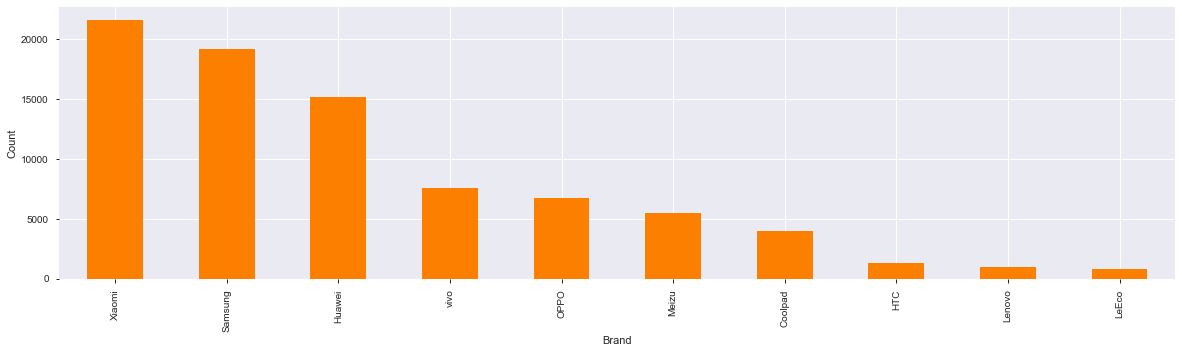

In [241]:
plt.figure(figsize=(20,5))
phone_brand_device_model_df['phone_brand'].value_counts()[:10].sort_values(ascending = False).plot.bar(colormap = 'Wistia_r')
plt.xlabel('Brand')
plt.ylabel('Count')


<a id=section36><a>
#### Model wise top 30 count of devices

Text(0, 0.5, 'Count')

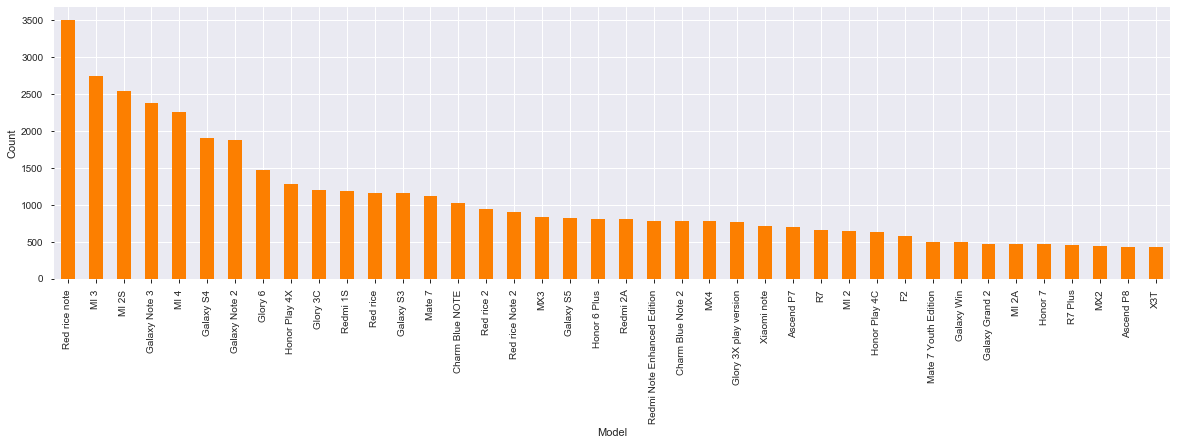

In [40]:
plt.figure(figsize=(20,5))
phone_brand_device_model_df['device_model'].value_counts()[:40].sort_values(ascending = False).plot.bar(colormap = 'Wistia_r')
plt.xlabel('Model')
plt.ylabel('Count')


<a id=section37><a>
#### Each Brand wise Models and top 10 count of devices

In [61]:
for i in phone_brand_device_model_df['phone_brand'].head(50).unique():
    print ('-----------',i,'-----------')
    print (phone_brand_device_model_df[phone_brand_device_model_df['phone_brand']==i]['device_model'].value_counts().head(10))

----------- vivo -----------
X3T        425
X5Pro      401
X3L        333
Xplay      293
X5SL       279
Y27        255
X5L        250
X5M        248
X5Max+     219
Xplay3S    214
Name: device_model, dtype: int64
----------- Xiaomi -----------
Red rice note                  3500
MI 3                           2739
MI 2S                          2547
MI 4                           2256
Redmi 1S                       1191
Red rice                       1168
Red rice 2                      941
Red rice Note 2                 903
Redmi 2A                        804
Redmi Note Enhanced Edition     786
Name: device_model, dtype: int64
----------- OPPO -----------
R7         663
R7 Plus    459
R7s        423
Find 7     381
R3         335
Find 5     294
R1S        292
A31        274
R1C        248
R831S      222
Name: device_model, dtype: int64
----------- Samsung -----------
Galaxy Note 3      2378
Galaxy S4          1910
Galaxy Note 2      1877
Galaxy S3          1156
Galaxy S5           827


<a id=section38><a>
#### Brand & Model wise top 50 count of devices

Text(0, 0.5, 'Count')

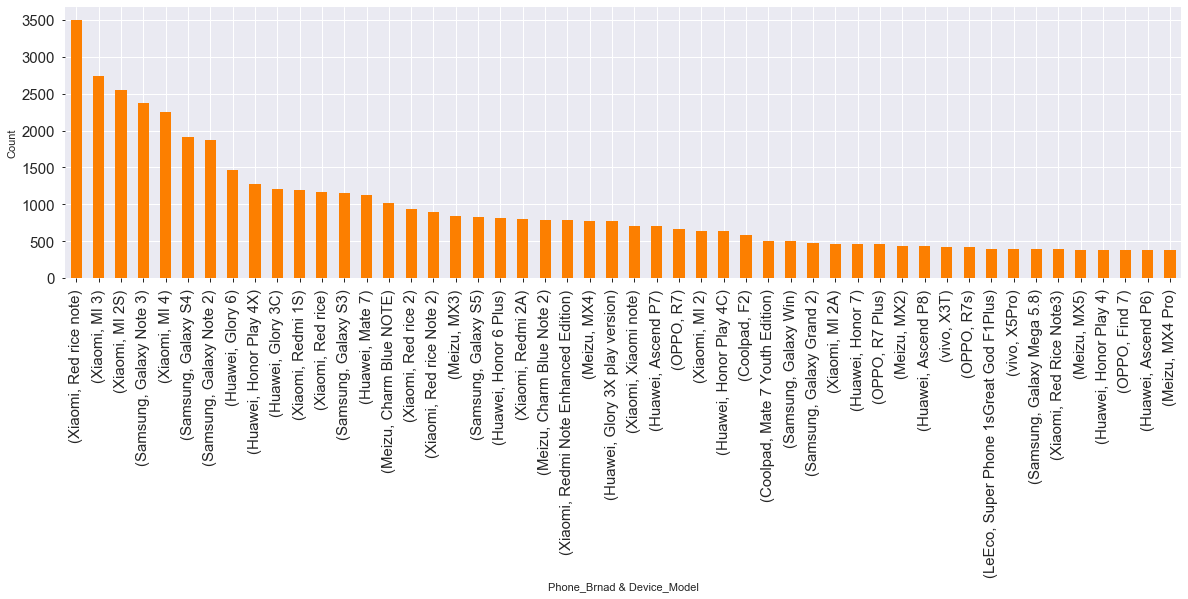

In [65]:
plt.figure(figsize=(20,5))
phone_brand_device_model_df.groupby(['phone_brand']).device_model.value_counts().nlargest(50).plot.bar(fontsize=15, colormap = 'Wistia_r')
plt.xlabel('Phone_Brnad & Device_Model')
plt.ylabel('Count')

<a id=section4></a>
### Events Data Extraction and Exploration

<a id=section41><a>
#### Extracting the data from CSV file

In [67]:
Events_data_df = pd.read_csv('F:\Data science Course\Machine learning-2\INSAID Telecom Capstone project\events_data.csv')

In [68]:
Events_data_df.head()

,event_id,device_id,timestamp,longitude,latitude,city,state
0,2765368,2.973348e+18,2016-05-07 22:52:05,77.225676,28.730140,Delhi,Delhi
1,2955066,4.734221e+18,2016-05-01 20:44:16,88.388361,22.660325,Calcutta,WestBengal
2,605968,-3.264500e+18,2016-05-02 14:23:04,77.256809,28.757906,Delhi,Delhi
3,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu
4,665740,3.388880e+17,2016-05-06 03:51:05,85.997745,23.842609,Bokaro,Jharkhand


In [69]:
Events_data_df.shape

(3252950, 7)

In [70]:
Events_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    float64
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(3), int64(1), object(3)
memory usage: 173.7+ MB


In [71]:
Events_data_df.describe(include = 'all')

,event_id,device_id,timestamp,longitude,latitude,city,state
count,3.252950e+06,3.252497e+06,3252950,3.252527e+06,3.252527e+06,3252950,3252573
unique,NaN,NaN,588126,NaN,NaN,933,32
top,NaN,NaN,2016-05-03 10:00:03,NaN,NaN,Delhi,Delhi
freq,NaN,NaN,43,NaN,NaN,744276,751733
mean,1.626476e+06,1.012200e+17,NaN,7.815868e+01,2.168851e+01,NaN,NaN
std,9.390459e+05,5.316758e+18,NaN,4.235570e+00,5.789111e+00,NaN,NaN
min,1.000000e+00,-9.222957e+18,NaN,1.256700e+01,8.190110e+00,NaN,NaN
25%,8.132382e+05,-4.540611e+18,NaN,7.583543e+01,1.780171e+01,NaN,NaN
50%,1.626476e+06,1.726820e+17,NaN,7.726814e+01,2.216454e+01,NaN,NaN
75%,2.439713e+06,4.861813e+18,NaN,8.031916e+01,2.868278e+01,NaN,NaN


In [72]:
Events_data_df.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state        377
dtype: int64

#### Replaceing NULL values for state 

In [73]:
Events_data_df['state'].unique()

array(['Delhi', 'WestBengal', 'TamilNadu', 'Jharkhand', 'AndhraPradesh',
       'Maharashtra', 'Gujarat', 'Kerala', 'MadhyaPradesh', 'Karnataka',
       'Rajasthan', 'Orissa', 'Punjab', 'UttarPradesh', 'Nagaland',
       'Haryana', 'Telangana', 'Chhattisgarh', 'Bihar', 'JammuandKashmir',
       'Assam', 'Goa', 'Mizoram', 'Tripura', 'Uttaranchal', nan,
       'Pondicherry', 'Manipur', 'Meghalaya', 'ArunachalPradesh',
       'HimachalPradesh', 'Chandigarh', 'AndamanandNicobarIslands'],
      dtype=object)

In [74]:
Events_data_df[Events_data_df['state'].isnull()]['city'].sort_values(ascending = True).unique()

array(['Arambagh', 'Channapatna', 'Chennai', 'Delhi', 'Gangarampur',
       'Indore', 'Jaipur', 'Pune', 'Visakhapatnam'], dtype=object)

The above cities are having states as NULL.

In [75]:
Events_data_df.loc[Events_data_df['city'] =='Visakhapatnam'].isnull().sum()

event_id      0
device_id    69
timestamp     0
longitude    63
latitude     63
city          0
state        47
dtype: int64

In [76]:
Events_data_df.loc[(Events_data_df['city'] =='Arambagh') & (Events_data_df['state'].isnull()),'state'] = 'WestBengal'

In [77]:
Events_data_df.loc[(Events_data_df['city'] =='Channapatna') & (Events_data_df['state'].isnull()),'state'] = 'Karnataka'

In [78]:
Events_data_df.loc[(Events_data_df['city'] =='Chennai') & (Events_data_df['state'].isnull()),'state'] = 'TamilNadu'

In [79]:
Events_data_df.loc[(Events_data_df['city'] =='Delhi') & (Events_data_df['state'].isnull()),'state'] = 'Delhi'

In [80]:
Events_data_df.loc[(Events_data_df['city'] =='Gangarampur') & (Events_data_df['state'].isnull()),'state'] = 'WestBengal'

In [81]:
Events_data_df.loc[(Events_data_df['city'] =='Indore') & (Events_data_df['state'].isnull()),'state'] = 'MadhyaPradesh'

In [82]:
Events_data_df.loc[(Events_data_df['city'] =='Jaipur') & (Events_data_df['state'].isnull()),'state'] = 'Rajasthan'

In [83]:
Events_data_df.loc[(Events_data_df['city'] =='Pune') & (Events_data_df['state'].isnull()),'state'] = 'Maharashtra'

In [84]:
Events_data_df.loc[(Events_data_df['city'] =='Visakhapatnam') & (Events_data_df['state'].isnull()),'state'] = 'AndhraPradesh'

In [85]:
Events_data_df[Events_data_df['city']=='Visakhapatnam'].isnull().sum()

event_id      0
device_id    69
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

In [86]:
Events_data_df.isnull().sum()


event_id       0
device_id    453
timestamp      0
longitude    423
latitude     423
city           0
state          0
dtype: int64

#### Checking NULL values for Longitude

In [87]:
Events_data_df[Events_data_df['longitude'].isnull()]['city'].unique()

array(['Delhi', 'Indore', 'Visakhapatnam', 'Chennai', 'Pune', 'Jaipur',
       'Araria', 'Moga', 'Bagaha'], dtype=object)

In [88]:
#Events_data_df.loc[(Events_data_df['city']=='Delhi')].head()

We can observe in the above result that longitude and latitude almost same for all records for Delhi. So, We can fill NULL values with median or mean values.

### Replacing NULL values of Longitude and Latitude with Mode for "Delhi" city

#### Longitude Mode value for Delhi

In [89]:
Delhi_long_mode=Events_data_df.loc[Events_data_df['city']=='Delhi']['longitude'].mode()
Delhi_long_mode

0    77.293991
dtype: float64

#### Latitude Mode value for Delhi

In [90]:
Delhi_lat_mode=Events_data_df.loc[Events_data_df['city']=='Delhi']['latitude'].mode()
Delhi_lat_mode

0    28.74982
dtype: float64

In [91]:
Events_data_df.loc[(Events_data_df['city']=='Delhi') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

We do have 63 NULL values for longitude as well latitude

In [92]:
Events_data_df.loc[(Events_data_df['city']=='Delhi') & (Events_data_df['longitude'].isnull()),'longitude'] = '77.293991'
Events_data_df.loc[(Events_data_df['city']=='Delhi') & (Events_data_df['latitude'].isnull()),'latitude'] = '28.74982'

In [93]:
Events_data_df.loc[(Events_data_df['city']=='Delhi') & (Events_data_df['latitude'].isnull())].isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### Replacing NULL values of Longitude and Latitude with Mode for "Indore" city

#### Longitude Mode value for Indore

In [94]:
Indore_long_mode = Events_data_df.loc[Events_data_df['city']=='Indore']['longitude'].mode()
Indore_long_mode

0    75.8955
dtype: object

#### Latitude Mode value for Indore

In [95]:
Indore_lat_mode = Events_data_df.loc[Events_data_df['city']=='Indore']['latitude'].mode()
Indore_lat_mode

0    22.8098
dtype: object

In [96]:
Events_data_df.loc[(Events_data_df['city']=='Indore') & (Events_data_df['latitude'].isnull())].isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

In [97]:
Events_data_df.loc[(Events_data_df['city']=='Indore') & (Events_data_df['longitude'].isnull()),'longitude'] = '75.8955'
Events_data_df.loc[(Events_data_df['city']=='Indore') & (Events_data_df['latitude'].isnull()),'latitude'] = '22.8098'

In [98]:
Events_data_df.loc[(Events_data_df['city']=='Indore') & (Events_data_df['latitude'].isnull())].isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### Replacing NULL values of Longitude and Latitude with Mode for "Visakhapatnam" city

#### Longitude Mode value for Visakhapatnam

In [99]:
Visakha_long_mode=Events_data_df.loc[Events_data_df['city']=='Visakhapatnam']['longitude'].mode()
Visakha_long_mode

0    83.3267
dtype: object

#### Latitude Mode value for Visakhapatnam

In [100]:
Visakha_lat_mode=Events_data_df.loc[Events_data_df['city']=='Visakhapatnam']['latitude'].mode()
Visakha_lat_mode

0    17.8297
dtype: object

In [101]:
Events_data_df.loc[(Events_data_df['city']=='Visakhapatnam') & (Events_data_df['latitude'].isnull())].isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

In [102]:
Events_data_df.loc[(Events_data_df['city']=='Visakhapatnam') & (Events_data_df['longitude'].isnull()),'longitude'] = '83.3267'
Events_data_df.loc[(Events_data_df['city']=='Visakhapatnam') & (Events_data_df['latitude'].isnull()),'latitude'] = '17.8297'

In [103]:
Events_data_df.loc[(Events_data_df['city']=='Visakhapatnam') & (Events_data_df['latitude'].isnull())].isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### Replacing NULL values of Longitude and Latitude with Mode for "Chennai" city

#### Longitude Mode value for Chennai

In [104]:
Chennai_long_mode=Events_data_df.loc[Events_data_df['city']=='Chennai']['longitude'].mode()
Chennai_long_mode

0    80.3598
dtype: object

#### Latitude Mode value for Chennai

In [105]:
Chennai_lat_mode=Events_data_df.loc[Events_data_df['city']=='Chennai']['latitude'].mode()
Chennai_lat_mode

0    13.1282
dtype: object

In [106]:
Events_data_df.loc[(Events_data_df['city']=='Chennai') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

In [107]:
Events_data_df.loc[(Events_data_df['city']=='Chennai') & (Events_data_df['longitude'].isnull()),'longitude'] = '80.3598'
Events_data_df.loc[(Events_data_df['city']=='Chennai') & (Events_data_df['latitude'].isnull()),'latitude'] = '13.1282'

In [108]:
Events_data_df.loc[(Events_data_df['city']=='Chennai') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### Replacing NULL values of Longitude and Latitude with Mode for "Pune" city

#### Longitude Mode value for Pune

In [109]:
Pune_long_mode=Events_data_df.loc[Events_data_df['city']=='Pune']['longitude'].mode()
Pune_long_mode

0    73.9263
dtype: object

#### Latitude Mode value for Pune

In [110]:
Pune_lat_mode=Events_data_df.loc[Events_data_df['city']=='Pune']['latitude'].mode()
Pune_lat_mode

0    18.6161
dtype: object

In [111]:
Events_data_df.loc[(Events_data_df['city']=='Pune') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude    63
latitude     63
city          0
state         0
dtype: int64

In [112]:
Events_data_df.loc[(Events_data_df['city']=='Pune') & (Events_data_df['longitude'].isnull()),'longitude'] = '73.9263'
Events_data_df.loc[(Events_data_df['city']=='Pune') & (Events_data_df['latitude'].isnull()),'latitude'] = '18.6161'

In [113]:
Events_data_df.loc[(Events_data_df['city']=='Pune') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [114]:
Events_data_df.isnull().sum()

event_id       0
device_id    453
timestamp      0
longitude    108
latitude     108
city           0
state          0
dtype: int64

### Replacing NULL values of Longitude and Latitude with Mode for "Jaipur" city

#### Longitude Mode value for Jaipur

In [115]:
Jaipur_long_mode=Events_data_df.loc[Events_data_df['city']=='Jaipur']['longitude'].mode()
Jaipur_long_mode

0    75.8941
dtype: object

#### Latitude Mode value for Jaipur

In [116]:
Jaipur_lat_mode=Events_data_df.loc[Events_data_df['city']=='Jaipur']['latitude'].mode()
Jaipur_lat_mode

0    26.9497
dtype: object

In [117]:
Events_data_df.loc[(Events_data_df['city']=='Jaipur') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude    66
latitude     66
city          0
state         0
dtype: int64

In [118]:
Events_data_df.loc[(Events_data_df['city']=='Jaipur') & (Events_data_df['longitude'].isnull()),'longitude'] = '75.8941'
Events_data_df.loc[(Events_data_df['city']=='Jaipur') & (Events_data_df['latitude'].isnull()),'latitude'] = '26.9497'

In [119]:
Events_data_df.loc[(Events_data_df['city']=='Jaipur') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### Replacing NULL values of Longitude and Latitude with Mode for "Araria" city

#### Longitude Mode value for Araria 

In [120]:
Araria_long_mode=Events_data_df.loc[Events_data_df['city']=='Araria']['longitude'].mode()
Araria_long_mode

0    87.5707
dtype: object

#### Latitude Mode value for Araria

In [121]:
Araria_lat_mode=Events_data_df.loc[Events_data_df['city']=='Araria']['latitude'].mode()
Araria_lat_mode

0    26.2119
dtype: object

In [122]:
Events_data_df.loc[(Events_data_df['city']=='Araria') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude    14
latitude     14
city          0
state         0
dtype: int64

In [123]:
Events_data_df.loc[(Events_data_df['city']=='Araria') & (Events_data_df['longitude'].isnull()),'longitude'] = '87.5707'
Events_data_df.loc[(Events_data_df['city']=='Araria') & (Events_data_df['latitude'].isnull()),'latitude'] = '26.2119'

In [124]:
Events_data_df.loc[(Events_data_df['city']=='Araria') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### Replacing NULL values of Longitude and Latitude with Mode for "Moga" city

#### Longitude Mode value for Moga 

In [125]:
Moga_long_mode=Events_data_df.loc[Events_data_df['city']=='Moga']['longitude'].mode()
Moga_long_mode

0    75.2687
dtype: object

#### Latitude Mode value for Moga 

In [126]:
Moga_lat_mode=Events_data_df.loc[Events_data_df['city']=='Moga']['latitude'].mode()
Moga_lat_mode

0    30.9042
dtype: object

In [127]:
Events_data_df.loc[(Events_data_df['city']=='Moga') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude    14
latitude     14
city          0
state         0
dtype: int64

In [128]:
Events_data_df.loc[(Events_data_df['city']=='Moga') & (Events_data_df['longitude'].isnull()),'longitude'] = '75.2687'
Events_data_df.loc[(Events_data_df['city']=='Moga') & (Events_data_df['latitude'].isnull()),'latitude'] = '30.9042'

In [129]:
Events_data_df.loc[(Events_data_df['city']=='Moga') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

### Replacing NULL values of Longitude and Latitude with Mode for "Bagaha" city

#### Longitude Mode value for Bagaha 

In [130]:
Bagaha_long_mode=Events_data_df.loc[Events_data_df['city']=='Bagaha']['longitude'].mode()
Bagaha_long_mode

0    84.1409
dtype: object

#### Latitude Mode value for Bagaha 

In [131]:
Bagaha_lat_mode=Events_data_df.loc[Events_data_df['city']=='Bagaha']['latitude'].mode()
Bagaha_lat_mode

0    27.1774
dtype: object

In [132]:
Events_data_df.loc[(Events_data_df['city']=='Bagaha') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id      0
device_id     0
timestamp     0
longitude    14
latitude     14
city          0
state         0
dtype: int64

In [133]:
Events_data_df.loc[(Events_data_df['city']=='Bagaha') & (Events_data_df['longitude'].isnull()),'longitude'] = '84.1409'
Events_data_df.loc[(Events_data_df['city']=='Bagaha') & (Events_data_df['latitude'].isnull()),'latitude'] = '27.1774'

In [134]:
Events_data_df.loc[(Events_data_df['city']=='Bagaha') & (Events_data_df['longitude'].isnull())].isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [135]:
missing_data(Events_data_df)

,Total,Percent
device_id,453,0.013926
state,0,0.000000
city,0,0.000000
latitude,0,0.000000
longitude,0,0.000000
timestamp,0,0.000000
event_id,0,0.000000


### Replace NULL values for "Device_id"

In [136]:
Events_data_df[Events_data_df['device_id'].isnull()].groupby(Events_data_df['city']).count()

,event_id,device_id,timestamp,longitude,latitude,city,state
city,,,,,,,
Bardoli,16,0,16,16,16,16,16
Chennai,63,0,63,63,63,63,63
Delhi,69,0,69,69,69,69,69
Hoshiarpur,16,0,16,16,16,16,16
Indore,51,0,51,51,51,51,51
Jaipur,81,0,81,81,81,81,81
Jetpur,16,0,16,16,16,16,16
Pune,72,0,72,72,72,72,72
Visakhapatnam,69,0,69,69,69,69,69


In [137]:
#Events_data_df.loc[(Events_data_df['city'] == 'Bardoli') & (Events_data_df['device_id'].isnull())]

In [138]:
#Events_data_df.loc[Events_data_df['city'] == 'Bardoli'].groupby(Events_data_df['device_id']).count()

In [139]:
Events_data_df.loc[Events_data_df['city'] == 'Bardoli']['device_id'].mode()

0   -8.215771e+18
dtype: float64

In [140]:
Events_data_df.loc[Events_data_df['city'] == 'Chennai']['device_id'].mode()

0    5.536513e+18
dtype: float64

In [141]:
Events_data_df.loc[Events_data_df['city'] == 'Delhi']['device_id'].mode()

0   -6.242501e+18
dtype: float64

In [142]:
Events_data_df.loc[Events_data_df['city'] == 'Hoshiarpur']['device_id'].mode()

0    1.750779e+18
dtype: float64

In [143]:
Events_data_df.loc[Events_data_df['city'] == 'Indore']['device_id'].mode()

0    3.751556e+18
dtype: float64

In [144]:
Events_data_df.loc[Events_data_df['city'] == 'Jaipur']['device_id'].mode()

0   -5.330179e+18
dtype: float64

In [145]:
Events_data_df.loc[Events_data_df['city'] == 'Jetpur']['device_id'].mode()

0   -1.688015e+18
dtype: float64

In [146]:
Events_data_df.loc[Events_data_df['city'] == 'Pune']['device_id'].mode()

0    4.428421e+17
dtype: float64

In [147]:
Events_data_df.loc[Events_data_df['city'] == 'Visakhapatnam']['device_id'].mode()

0    3.137054e+18
dtype: float64

In [148]:
Events_data_df.loc[(Events_data_df['city'] == 'Bardoli') & (Events_data_df['device_id'].isnull())].isnull().sum()

event_id      0
device_id    16
timestamp     0
longitude     0
latitude      0
city          0
state         0
dtype: int64

In [149]:
Events_data_df.loc[(Events_data_df['city'] == 'Bardoli') & (Events_data_df['device_id'].isnull()),'device_id'] = '-8.215771e+18'

In [150]:
Events_data_df.loc[(Events_data_df['city'] == 'Bardoli') & (Events_data_df['device_id'].isnull())].isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [151]:
Events_data_df.loc[(Events_data_df['city'] == 'Chennai') & (Events_data_df['device_id'].isnull()),'device_id'] = '5.536513e+18'

In [152]:
Events_data_df.loc[(Events_data_df['city'] == 'Chennai') & (Events_data_df['device_id'].isnull())].isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [153]:
Events_data_df.loc[(Events_data_df['city'] == 'Delhi') & (Events_data_df['device_id'].isnull()),'device_id'] = '-6.242501e+18'

In [192]:
Events_data_df.loc[(Events_data_df['city'] == 'Delhi') & (Events_data_df['device_id'].isnull())].isnull().sum()

,event_id,device_id,timestamp,longitude,latitude,city,state


In [155]:
Events_data_df.loc[(Events_data_df['city'] == 'Hoshiarpur') & (Events_data_df['device_id'].isnull()),'device_id'] = '1.750779e+18'

In [156]:
Events_data_df.loc[(Events_data_df['city'] == 'Indore') & (Events_data_df['device_id'].isnull()),'device_id'] = '3.751556e+18'

In [157]:
Events_data_df.loc[(Events_data_df['city'] == 'Jaipur') & (Events_data_df['device_id'].isnull()),'device_id'] = '-5.330179e+18'

In [158]:
Events_data_df.loc[(Events_data_df['city'] == 'Jetpur') & (Events_data_df['device_id'].isnull()),'device_id'] = '-1.688015e+18'

In [159]:
Events_data_df.loc[(Events_data_df['city'] == 'Pune') & (Events_data_df['device_id'].isnull()),'device_id'] = '4.428421e+17'

In [160]:
Events_data_df.loc[(Events_data_df['city'] == 'Visakhapatnam') & (Events_data_df['device_id'].isnull()),'device_id'] = '3.137054e+18'

In [161]:
Events_data_df.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [162]:
Events_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    object
timestamp    object
longitude    object
latitude     object
city         object
state        object
dtypes: int64(1), object(6)
memory usage: 173.7+ MB


In [163]:
Events_data_df['longitude'] = Events_data_df['longitude'].astype(float)

In [164]:
Events_data_df['latitude'] = Events_data_df['latitude'].astype(float)

In [165]:
Events_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3252950 entries, 0 to 3252949
Data columns (total 7 columns):
event_id     int64
device_id    object
timestamp    object
longitude    float64
latitude     float64
city         object
state        object
dtypes: float64(2), int64(1), object(4)
memory usage: 173.7+ MB


In [166]:
#Events_data_df.loc[Events_data_df['city'] == 'Delhi'].groupby(Events_data_df['device_id']).count()\
#.sort_values('event_id', axis = 0, ascending = False)

In [167]:
Events_data_df.isnull().sum()

event_id     0
device_id    0
timestamp    0
longitude    0
latitude     0
city         0
state        0
dtype: int64

In [168]:
df_sixstates = Events_data_df.loc[Events_data_df['state'].isin(['TamilNadu','Manipur','Chandigarh','Tripura','UttarPradesh','ArunachalPradesh'])]

In [169]:
df_sixstates.shape

(534462, 7)

In [182]:
df_sixstates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 534462 entries, 3 to 3252949
Data columns (total 7 columns):
event_id     534462 non-null int64
device_id    534462 non-null float64
timestamp    534462 non-null object
longitude    534462 non-null float64
latitude     534462 non-null float64
city         534462 non-null object
state        534462 non-null object
dtypes: float64(3), int64(1), object(3)
memory usage: 32.6+ MB


In [183]:
gender_age_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74645 entries, 0 to 74644
Data columns (total 4 columns):
device_id    74645 non-null float64
gender       74645 non-null object
age          74645 non-null int64
group        74645 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 2.3+ MB


In [184]:
phone_brand_device_model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87726 entries, 0 to 87725
Data columns (total 3 columns):
device_id       87726 non-null float64
phone_brand     87726 non-null object
device_model    87726 non-null object
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


In [179]:
df_sixstates['device_id'] = df_sixstates['device_id'].astype(float)

C:\Users\krishna\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [180]:
gender_age_train_df['device_id'] = gender_age_train_df['device_id'].astype(float)

In [181]:
phone_brand_device_model_df['device_id'] = phone_brand_device_model_df['device_id'].astype(float)

In [185]:
Merged_data = df_sixstates.merge(phone_brand_device_model_df,on='device_id').merge(gender_age_train_df,on='device_id')

In [187]:
Merged_data.shape

(534399, 12)

In [188]:
Merged_data.head()

,event_id,device_id,timestamp,longitude,latitude,city,state,phone_brand,device_model,gender,age,group
0,448114,5.731369e+18,2016-05-03 13:21:16,80.343613,13.153332,Chennai,TamilNadu,HTC,One max,M,26,M23-26
1,2330011,5.731369e+18,2016-05-05 12:44:32,80.343613,13.153332,Chennai,TamilNadu,HTC,One max,M,26,M23-26
2,1895687,5.731369e+18,2016-05-02 12:45:05,80.343613,13.153332,Chennai,TamilNadu,HTC,One max,M,26,M23-26
3,619715,5.731369e+18,2016-05-02 03:37:12,80.343613,13.153332,Chennai,TamilNadu,HTC,One max,M,26,M23-26
4,936200,5.731369e+18,2016-05-04 19:18:59,80.343613,13.153332,Chennai,TamilNadu,HTC,One max,M,26,M23-26


Text(0.5, 0, 'Age')

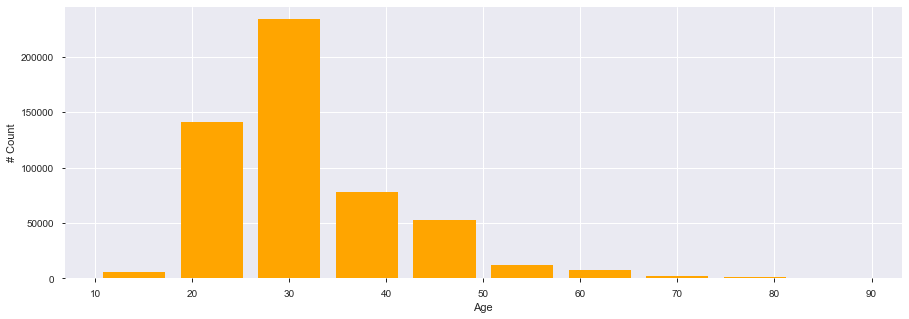

In [205]:
plt.figure(figsize=(15,5))
range = (10,90)
plt.hist(Merged_data['age'], 10, range, color = 'orange', rwidth = 0.8)
plt.ylabel("# Count")
plt.xlabel("Age")

In [279]:
Merged_data.head()
dfg = Merged_data.groupby(['state']).agg({'device_id': [ 'count']})
pd.set_option('display.max_rows', 1000)
Stateusers = dfg['device_id','count'].groupby(level=0, group_keys=False).apply(
    lambda x: x.sort_values(ascending=False).head(10)).reset_index(name='count')
Stateusers

,state,count
0,ArunachalPradesh,608
1,Chandigarh,894
2,Manipur,989
3,TamilNadu,436266
4,Tripura,892
5,UttarPradesh,94750


In [306]:
Stateusers = set(zip(Merged_data['state'],Merged_data['device_id']))
Stateusers = pd.DataFrame(Stateusers,columns = ['state','device_id'])
Stateusers.shape

(9563, 2)

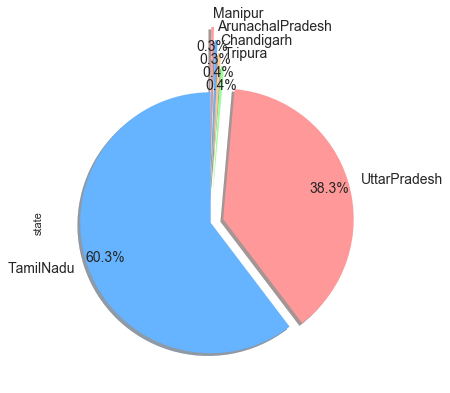

In [308]:

explode = (0, 0.1,0.2,0.3,0.4,0.5)
colors = ['#66b3ff','#ff9999','#99ff99','#ffcc99']
Stateusers['state'].value_counts().plot(kind='pie', fontsize=14, autopct='%3.1f%%', explode=explode,pctdistance=0.85,
                                               figsize=(6,6), shadow=True, startangle=90, colors = colors)

#plt.ylabel('State')
#plt.title('Pie chart showing the percentage of State')
#plt.tight_layout()


Text(0, 0.5, 'Count of events')

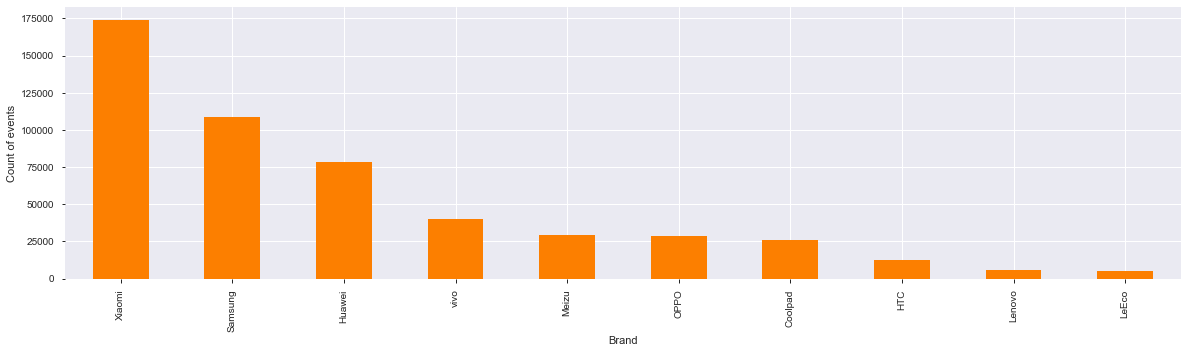

In [245]:
plt.figure(figsize=(20,5))
Merged_data['phone_brand'].value_counts()[:10].sort_values(ascending = False).plot.bar(colormap = 'Wistia_r')
plt.xlabel('Brand')
plt.ylabel('Count of events')
